<div style="padding:30px; color: white; background-color: #0071CD">
<center>
<img src="img/logoub.jpeg">
<center>
<p>
<h1>Algorítmica Avanzada</h1>
<h2>Problemas 2 - Greedy </h2>
</center>
</p>
</div>

<div style="width:90%; margin:0 auto;">
  <h2><p>Minimum Spanning Tree</p></h2>
  <p>
Dado un grafo conexo y no dirigido, un spanning tree de ese grafo es un subgrafo que tiene que ser un árbol (sin ciclos) y contener todos los vértices del grafo inicial. Cada arista tiene asignado un peso, que es un número representativo de algún objeto, distancia, etc. y se usa para asignar un peso total al MST computando la suma de todos los pesos de las aristas del árbol en cuestión. Un MST o minimum spanning tree es un árbol recubridor que pesa menos o igual que caulquier otro árbol recubridor de ese grafo. Todo grafo tiene un bosque recubridor mínimo.
  </p>
<img width="300px" src="img/mst.png">
  </div>



<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>1- Kruskal Algorithm</p></h2>
  El algoritmo de Kruskal es un algoritmo voraz que calcula el MST de un grafo dado. Se basa en ir añadiendo a cada paso la arista más pequeña del grafo que conecte dos subárboles que no estaban previamente conectados.
    
   <center><img width="250px" src="./img/KruskalDemo.gif"></center>

<p>
En este apartado tendréis que implementar el algoritmo de Kruskal para obtener el Minimum Spanning Tree de cualquier grafo no dirigido. 
  </p>


In [1]:
# Imports
import networkx as nx

In [31]:
from operator import itemgetter
import collections

#Usamos get Set para obtener el árbol del nodo seleccionado
def getSet(G, start):
    queue = collections.deque()
    queue.append(start)
    nodeSet = set()
    nodeSet.add(start)
    while queue:
        node = queue.pop()
        for neighbor in G.neighbors(node):
            if neighbor not in nodeSet:
                queue.append(neighbor)
                nodeSet.add(neighbor)
    return list(nodeSet)
    
    
def kruskalPrototype(G):
    """ Implementación del algoritmo de Kruskal para obtener el MST de un grafo cualquiera.
    Args:
        G (nx.Graph): El grafo de tipo nx.Graph sobre el que queremos obtener el MST. 
                      Las aristas tienen el atributo 'weight' que indica su peso.
    Returns:
        tree (nx.Graph): El grafo de tipo nx.Graph que contiene el arbol de expansión mínima.
        weight (float/int): El peso total del grafo tree.
    """
    tree = nx.Graph()
    total_weight = 0  
    # Implement Kruskal algorithm here
    
    #Get every edge with it weight and order it.
    edgeList = []
    for edge in G.edges.data():
        edgeList.append([edge[0],edge[1],edge[2]['weight']])
    edgeList.sort(key=lambda x: x[2]) #Sort by weight
    
    
    while edgeList:
        edge = edgeList.pop(0)
        tree.add_nodes_from([edge[0],edge[1]])
        nodeSetA = getSet(tree, edge[0])
        nodeSetB = getSet(tree, edge[1])
        
        #Comparamos los árboles de los nodos para evitar ciclos
        if nodeSetA != nodeSetB:
            tree.add_edge(edge[0],edge[1],weight = edge[2])
            total_weight += edge[2]
    
    return tree, total_weight

"""
Esta versión de Kruskal puede llegar a ser más eficiente en grafos muy pequeños, pero a medida que son mayores su complejidad
escala demasiado.
"""

In [3]:
import collections
    
def kruskal(G):
    #Return items
    tree = nx.Graph()
    total_weight = 0
    
    #Dictionary with the sets of every node
    nodeSetDict = {k: [k] for k in list(G.nodes())}
    #Get every edge with it weight and order it.
    edgeList = [[edge[0],edge[1],edge[2]['weight']] for edge in G.edges.data()]
    edgeList.sort(key=lambda x: x[2]) #Sort by weight
    
    #We iterate over our sorted edgeList
    while edgeList:
        edge = edgeList.pop(0)
        tree.add_nodes_from([edge[0],edge[1]])
        setA, setB = nodeSetDict[edge[0]], nodeSetDict[edge[1]]
        
        #Comparisson between sets of nodes to avoid cycles
        if setA != setB:
            tree.add_edge(edge[0],edge[1],weight = edge[2])
            total_weight += edge[2]
            setA.extend(setB)
            
            #Update the sets of the nodes involved
            for i in setA:
                nodeSetDict[i] = setA

    return tree, total_weight


<div class="alert alert-success" style="width:90%; margin:0 auto;">
  <h2><p>2- Prim Algorithm</p></h2>
  Igual que Kruskal, el algoritmo de Prim es un algoritmo voraz que calcula el MST de un grafo dado. La diferencia fundamental es en el orden en que se añaden aristas. Prim empieza en un nodo concreto y se basa en ir añadiendo a cada paso la arista más pequeña de entre las que conectan los nodos ya pertenecientes al árbol con sus vecinos.
    
   <center><img width="250px" src="./img/PrimDemo.gif"></center>

<p>
En este apartado tendréis que implementar el algoritmo de Prim para obtener el Minimum Spanning Tree de cualquier grafo no dirigido y conexo. 
  </p>


In [4]:
import heapq
from random import choice
#Gets random node to begin if none given
def arbitraryStart(G):
    return choice(list(G.nodes()))


def prim(G,origen=None,infinity=float('inf')):
    """ Implementación del algoritmo de Prim para obtener el MST de un grafo cualquiera.
    Args:
        G (nx.Graph): El grafo sobre el que queremos obtener el MST. 
                      Las aristas tienen el atributo 'weight' que indica su peso.
        origin (node_id): Opcional, nodo por el cual comenzar la búsqueda.
        infinity (float): Opcional, valor para inicializar las distancias.
    Returns:
        tree (nx.Graph): El grafo que contiene el arbol de expansión mínima.
        weight (float/int): El peso total del grafo tree.
    """
    tree = nx.Graph()
    total_weight = 0
    #If origen not given I generate a random start point
    if not origen:
        origen = arbitraryStart(G)
        
    heap = []  
    # Implement Prim algorithm here
    heapq.heappush(heap, [0, origen, None])
    
    #If we get all the nodes of G in our tree we can finish the iterator
    while heap or len(list(tree.nodes())) != len(list(G.nodes)):
        distance, node, parent = heapq.heappop(heap)
        
        if node != origen:
            if node not in list(tree.nodes()):
                tree.add_node(node)
                total_weight += distance
                tree.add_edge(parent, node, weight = distance)
            else: #We skip this repeated node
                continue
        else: #If node == origen we only need to add the node to the tree
            tree.add_node(node)
            
        #We iterate over every neighbor of the added node and add them to our heap
        for neighbor in list(G.neighbors(node)):
            if neighbor not in list(tree.nodes()):
                heapq.heappush(heap, [G.edges[node, neighbor]['weight'], neighbor, node])
        
    return tree, total_weight

<div class="alert alert-danger" style="width:80%; margin:0 auto; padding">
<center><p><h3> Tests </h3></p> </center>
<p>
Realiza los tests pertinentes en las celdas dispuestas a continuación.
</p>
</div>


TOTAL MST WEIGHT
NX MST  33
Kruskal 33
Prim    33


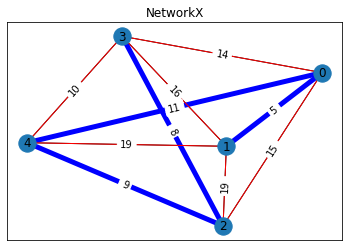

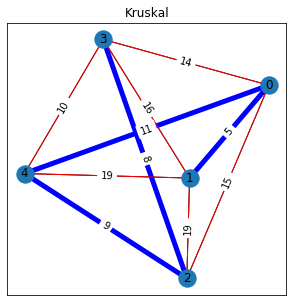

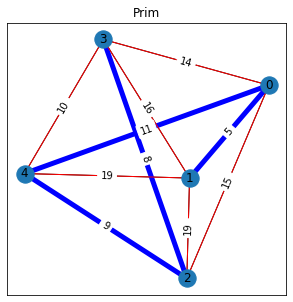

In [7]:
%matplotlib inline
from utils import *

# Create random Graph
num_v = 5 # Num nodes
num_e = 15 # Num edges
G = generate_random_graph(num_v,num_e)

# Run test
test_algs(G,kruskal,prim,0) # 0 for both, 1 for kruskal only, 2 for prim only

<div class="alert alert-warning">
<h1>Pregunta 1</h1>
<p><strong>
Explica las diferencias entre los algoritmos de Kruskal y Prim. ¿Para qué casos (características concretas de un grafo) es uno más eficiente que el otro?
</strong></p>
</div>

Kruskal al usar las aristas para crear el MST es mejor para gráficos "Sparse", mientras que Prim, al usar un nodo aleatorio y buscar las aristas más pequeñas a las que está conectado, será mejor para grafos densos.

<div class="alert alert-warning">
<h1>Pregunta 2</h1>
<p><strong>
Explica tu implementación y analiza la complejidad de ambos algoritmos.
</strong></p>
</div>

Para realizar Kruskal (la versión final), he creado un diccionario donde almaceno para cada nodo en qué set se encuentra por tal de buscar los sets más rápido. También he creado un array de las aristas que ordeno por tamaño de menor a mayor que iremos recorriendo para obtener el MST. Si los sets que comparamos coinciden lo que haremos pasar a la siguiente iteración porque generaría ciclos innecesarios que solo aumentarían el peso del MST. La complejidad de este algoritmo es de O(E log V).

Para realizar Prim he optado por usar un heap binario para coger la arista de menor peso que está conectada al MST que vamos generando. En el caso de este algoritmo al obtener la arista más pequeña comprobamos que los dos nodos de la arista no estén ya en el MST puesto que generaríamos un ciclo innecesario aumentando el peso del BST. La complejidad de este algoritmo es de O(EV log V), aunque podría ser mejorada con un heap de fibonacci.

<div class="alert alert-info">
<center>
  <h1>Entrega</h1>
</center>
<p>
La entrega de esta práctica se podrá realizar en el campus virtual hasta el día <b>17 de Noviembre a las 23:55</b>. En la tarea que se habilitará en el campus deberéis colgar <b>únicamente este notebook</b> con el nombre:
</p>
<p>
```
[grupo]_[apellido]_[nombre]_2-Greedy.ipynb
```

</p>
<p>
    Por ejemplo, para un alumno llamado <i>Nombre Genérico</i> perteneciente al <i>grupo Z</i> el nombre del archivo debería ser:
</p>
<p>
```
Z_Generico_Nombre_2-Greedy.ipynb
```

Y <b>NO</b>:
<ul>
<li>Z00_Generico_Nombre_2-Greedy.zip</li>
    
<li>ZX_Generico_Nombre_2-Greedy.ipynb</li>

<li>Lab2_Generico_Nombre_2-Greedy.rar</li>

<li>2-Greedy.ipynb</li>
<li> ... literalmente cualquier otra cosa que no sea el nombre que sí hay que ponerle </li>
</ul>
</p>
<p>

Es muy importante que en el notebook exista <b> una sola función </b> con el nombre <i>kruskal</i> y <i>prim</i> ya que emplearemos un corrector automático para agilizar el proceso. Podéis tener tantas funciones auxiliares como queráis, pero no puede haber dos funciones con el mismo nombre. No os preocupéis si no os funciona del todo, el no pasar los tests no significa necesariamente que tengáis un 0 en la práctica; también revisaremos manualmente el código así como los comentarios del final del notebook y vuestro análisis de complejidad.


Es fundamental que el código esté bién comentado y con un análisis de complejidad exhaustivo del algoritmo. La importancia de poner nombre correcto al archivo debería ser directamente proporcional a lo contentos que queráis que los profesores de prácticas corrijan.<b> No adherirse al formato en el nombre del archivo así como entregar otro tipo de archivo o varios archivos, conllevará a la no corrección de vuestra práctica.</b>
</p>
</div>